In [3]:
import pandas as pd

In [4]:
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

In [5]:
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # 그림을 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kipioneer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kipioneer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
with open("./해커톤/정부민원.txt", 'r', encoding='utf-8') as f:
    text = f.read()

In [9]:
text

'국세청 홈택스에서 종합소득세 신고 후 개인지방소득세(종합소득분) 연계 신고 방법은 어떻게 되나요?\n국세청 홈택스에서 양도소득세 신고 후 개인지방소득세(양도소득분) 연계 신고 방법은 어떻게 되나요?\n위택스에서 종합소득분 신고 취소 경로 알려주세요.\n위택스에서 종합소득분 신고 시 환급 계좌 입력은 필수인가요?\n종합소득분을 신고(납부)하였으나, 추가 납부할 세액이 발생한 경우 어떻게 해야 하나요?\n종합소득분을 과다 납부한 경우 어떻게 해야 하나요?\n홈택스에서 종합소득세(국세)를 환급으로 신고 후 종합소득분(지방세) 연계 신고하였으나, 납부할 세액이 확인됩니다.\n동물학대에는 어떤 종류가 있나요?\n반려동물 분실신고는 어떻게 하나요?\n반려동물 장례 절차가 있나요?\n반려동물을 분양을 받고자 하는데, 절차가 어떻게 되나요?\n로드킬 발견 시 신고는 어떻게 하나요?\n과수고품질시설 현대화 사업에 대해 궁금합니다.\n과수고품질시설현대화 사업 지원자격 및 지원내용, 신청방법 등이 궁금합니다.\n과수분야 스마트팜 확산사업에 대해 궁금합니다.\n유통시설현대화 사업에 대해 궁금합니다.\n과실브랜드 육성사업에 대해 궁금합니다.\n농지보전부담금은 무엇인가요?\n농지보전부담금 납부 관련 문의처를 알 수 있나요?\n농지보전부담금 납입확인서는 어떻게 발급 받을 수 있나요?\n농지법상 농지에 해당하지 않는 경우가 있나요?\n생애최초 부동산 취득 후 취득세 소급 및 환급 대상자입니다. 위택스에서 신청 가능한가요?\n청탁금지에 대해 궁금합니다.\n청탁금지법 부정청탁금지 위반사례가 궁금합니다.\n이해충돌 방지 세부행위기준에 대해 알고 싶습니다.\n이해충돌방지법이 무엇인가요?\n청탁금지법 금품 및 외부강의 등 초과사례금 수수사례가 궁금합니다.\n면제확인이란 무엇인가요?\n어린이보호포장이란 무엇인가요?\n수입통관신고란 무엇인가요?\n수입물품가격신고제도란 무엇인가요?\n잠정가격신고제도란 무엇인가요?\n다른 지역으로 이사한 경우 지방세 자동납부를 다시 신청해야 하나요?\n농로, 구거, 제

In [10]:
from konlpy.tag import Okt, Kkma, Komoran

In [ ]:
# pip install konlpy

In [ ]:
# pip install JPype1-0.5.7-cp27-none-win_amd64.whl

In [11]:
okt = Okt()

In [13]:
tokens = okt.nouns(text)

In [14]:
tokens

['국세청',
 '홈택스',
 '종합소득세',
 '신고',
 '후',
 '개인',
 '지방',
 '소득세',
 '종합',
 '소득',
 '계',
 '신고',
 '방법',
 '국세청',
 '홈택스',
 '양도소득세',
 '신고',
 '후',
 '개인',
 '지방',
 '소득세',
 '양도소득',
 '계',
 '신고',
 '방법',
 '위택스',
 '종합',
 '소득',
 '신고',
 '취소',
 '경로',
 '위택스',
 '종합',
 '소득',
 '신고',
 '시',
 '환급',
 '계좌',
 '입력',
 '필수',
 '종합',
 '소득',
 '신고',
 '납부',
 '추가',
 '납부',
 '세액',
 '발생',
 '경우',
 '하나요',
 '종합',
 '소득',
 '과',
 '납부',
 '경우',
 '하나요',
 '홈택스',
 '종합소득세',
 '국세',
 '를',
 '환급',
 '신고',
 '후',
 '종합',
 '소득',
 '지방세',
 '계',
 '신고',
 '납부',
 '세액',
 '확인',
 '동물학대',
 '종류',
 '반려동물',
 '분실',
 '신고',
 '하나요',
 '반려동물',
 '장례',
 '절차',
 '반려동물',
 '분양',
 '절차',
 '로드킬',
 '발견',
 '시',
 '신고',
 '하나요',
 '과수',
 '품질',
 '시설',
 '대화',
 '사업',
 '대해',
 '과수',
 '품질',
 '시설',
 '대화',
 '사업',
 '지원',
 '자격',
 '및',
 '지원',
 '내용',
 '신청',
 '방법',
 '등',
 '과수',
 '분야',
 '스마트',
 '확산',
 '사업',
 '대해',
 '유통',
 '시설',
 '대화',
 '사업',
 '대해',
 '과실',
 '브랜드',
 '사업',
 '대해',
 '농지',
 '보전',
 '부담',
 '금은',
 '무엇',
 '농지',
 '보전',
 '부담',
 '금',
 '납부',
 '관련',
 '의처',
 '알',
 '수',
 '농지',
 '보전',
 '부담',
 '금',


In [15]:
import re

In [17]:
tokens =[re.sub('[^가-힣]', '', token) for token in tokens]

In [18]:
len(tokens)

2724

# 최빈단어 추출

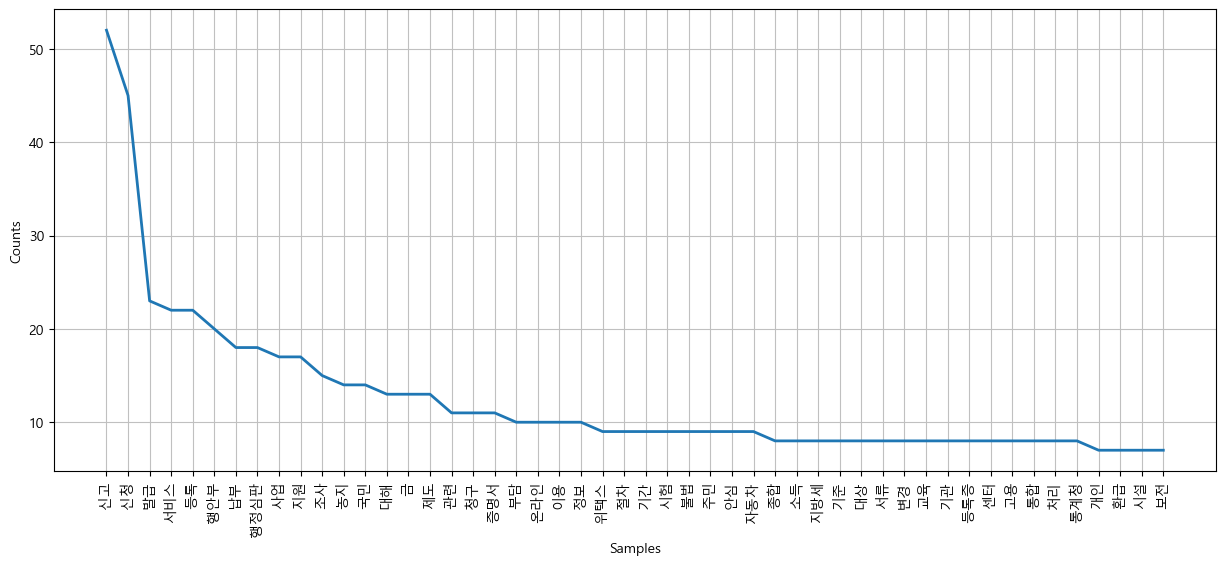

In [23]:
semi = nltk.Text(tokens, name='정부민원 최빈 단어')

# Generate the plot
plt.figure(figsize=(15,6))
semi.plot(50)

# Display the plot
plt.show()

In [22]:
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

In [21]:
# 제거해야하는 단어 입력후 실행
# stop_words 쪽으로 가서 한번더 실행하고 그래프 실행시키면 적용됨
stoptext = '''
무엇 수 하나요 방법 시 확인 경우 알 및 어디 란 후 등 곳 것 
'''

# 워드 클라우드

In [24]:
# 데이터 불러오기 
data = semi.vocab().most_common(300)
font_path = r'C:\Windows\Fonts\malgun.ttf'

In [25]:
# Wordcloud 를 wc 로 지정 및 시각화 설정
wc = WordCloud(background_color='white',
               font_path = font_path,
               relative_scaling=0.2).generate_from_frequencies(dict(data))

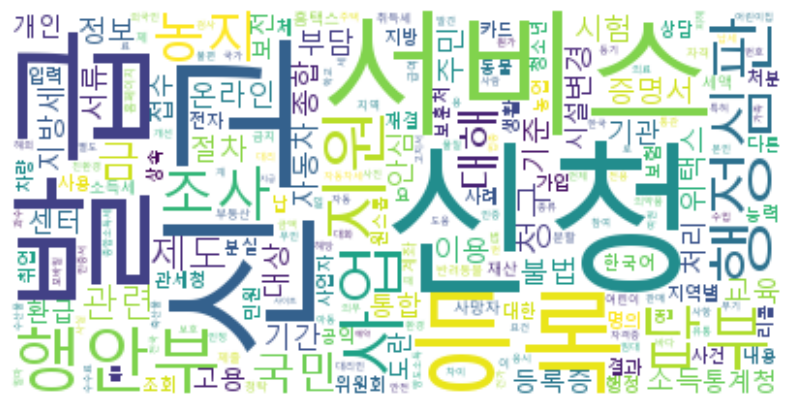

In [26]:
# 시각화 
plt.figure(figsize = (10,6))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()